In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from geopy.distance import distance
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from haversine import haversine, Unit
import folium

In [5]:
df = pd.read_csv('ALL_SPB_STOPS.CSV', sep=';', encoding='windows 1251', index_col=0)
df_stops = df.loc[df.index < 100000]
df_subway = df.loc[df.index >= 100000]
df_subway

,STOP_NAME,LATITUDE,LONGITUDE
ID_STOP,,,
100101,Пр.Ветеранов-1,59.841604,30.253984
100102,Пр.Ветеранов-2,59.842042,30.250084
100103,Ленинский пр.-1,59.851683,30.268385
100104,Ленинский пр.-2,59.849710,30.268348
100105,Автово,59.867292,30.261133
...,...,...,...
100513,Чкаловская,59.960987,30.292046
100514,Крестовский остров,59.971792,30.259414
100515,Старая Деревня,59.989538,30.255218


In [6]:
df

,STOP_NAME,LATITUDE,LONGITUDE
ID_STOP,,,
100101,Пр.Ветеранов-1,59.841604,30.253984
100102,Пр.Ветеранов-2,59.842042,30.250084
100103,Ленинский пр.-1,59.851683,30.268385
100104,Ленинский пр.-2,59.849710,30.268348
100105,Автово,59.867292,30.261133
...,...,...,...
4997,ЗАВОД ИМ. КАЛИНИНА [тест] <,59.950695,30.266132
4998,МАЛЫЙ ПР. В.О. ПО 9 ЛИНИИ [тест] <,59.945698,30.271969
5003,АДМИРАЛТЕЙСКИЙ ПР. [тест] <,59.936026,30.309259


In [7]:
selected_station = 100215
latitude = df.LATITUDE[selected_station]
longitude = df.LONGITUDE[selected_station]
stops = df_stops[df_stops.apply(lambda row:  haversine((row['LATITUDE'], row['LONGITUDE']), 
                                          (df.LATITUDE[selected_station], df.LONGITUDE[selected_station]), unit=Unit.METERS) < 1000, axis=1)]
df_stops

,STOP_NAME,LATITUDE,LONGITUDE
ID_STOP,,,
1282,"10 КМ [145, 165, 482, 482а, 482в, 484, 484б]",59.773372,30.125111
1285,12-13 ЛИНИИ (ПО СРЕДНЕМУ ПР. В.О.) [6],59.941121,30.271757
1287,18-19 ЛИНИИ [6],59.938798,30.264141
1290,"1-Я И КАДЕТСКАЯ ЛИНИЯ,УГ. СРЕДНЕГО ПР. [6]",59.944538,30.287008
1291,1-Я КРАСНОАРМЕЙСКАЯ УЛ. [71],59.915965,30.310436
...,...,...,...
4997,ЗАВОД ИМ. КАЛИНИНА [тест] <,59.950695,30.266132
4998,МАЛЫЙ ПР. В.О. ПО 9 ЛИНИИ [тест] <,59.945698,30.271969
5003,АДМИРАЛТЕЙСКИЙ ПР. [тест] <,59.936026,30.309259


In [8]:
stops

,STOP_NAME,LATITUDE,LONGITUDE
ID_STOP,,,
1383,БОЛЬШАЯ МОНЕТНАЯ УЛ. [46А],59.960944,30.316399
1391,БОЛЬШОЙ ПР. П.С.,59.961908,30.304874
15404,Улица Академика Павлова (31),59.974720,30.316721
15407,Улица Профессора Попова (31),59.970796,30.314077
15410,Площадь Льва Толстого (31),59.966564,30.313209
...,...,...,...
2598,БОЛЬШОЙ ПР. П.С.,59.962349,30.304211
3275,"СТ. МЕТРО ""ПЕТРОГРАДСКАЯ"" [1, 46А]<",59.966581,30.310656
3446,УЛ. ЛЕНИНА УГ. ЧКАЛОВСКОГО ПР. [1]<,59.964366,30.298859


C:\Users\Acer\AppData\Local\Temp\ipykernel_7072\804787457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops['kmeans_cluster'] = kmeans.fit_predict(stops[['LATITUDE', 'LONGITUDE']])
C:\Users\Acer\AppData\Local\Temp\ipykernel_7072\804787457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops['kmeans_cluster'] = kmeans.fit_predict(stops[['LATITUDE', 'LONGITUDE']])
C:\Users\Acer\AppData\Local\Temp\ipykernel_7072\804787457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

Text(0, 0.5, 'J_values')

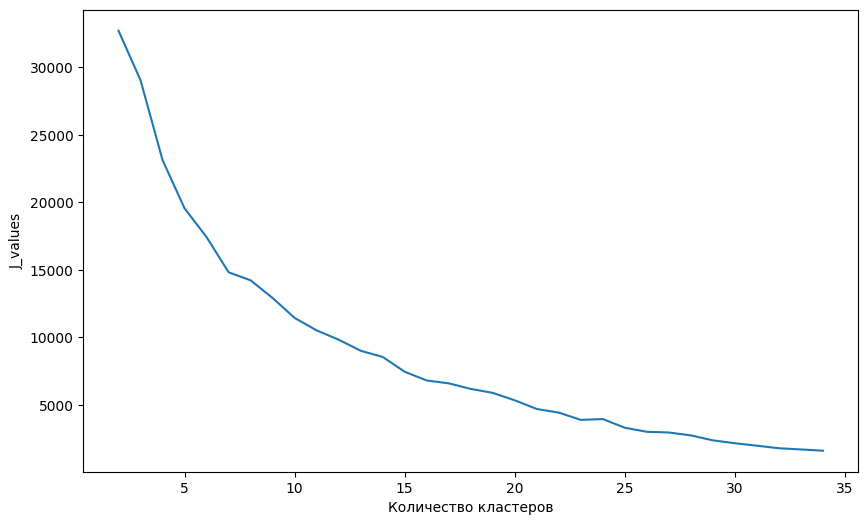

In [92]:
J_values = []
for k in range(2, 35):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=None)
    stops['kmeans_cluster'] = kmeans.fit_predict(stops[['LATITUDE', 'LONGITUDE']])
    clusters_lat = stops.groupby(by='kmeans_cluster').LATITUDE.mean()
    clusters_lon = stops.groupby(by='kmeans_cluster').LONGITUDE.mean()
    J = 0
    for i in clusters_lat.index:
        for j, row in stops[stops['kmeans_cluster'] == i].iterrows():
            J += haversine((row['LATITUDE'], row['LONGITUDE']), (clusters_lat[i],  clusters_lon[i]), unit=Unit.METERS)
    J_values.append(J)
plt.figure(figsize = (10,6))
plt.plot(range(2, 35), J_values)
plt.xlabel('Количество кластеров')
plt.ylabel('J_values')

In [93]:
N_CLUSTERS = 19

kmeans = KMeans(n_clusters=N_CLUSTERS, n_init=10, random_state=None)
stops['kmeans_cluster'] = kmeans.fit_predict(stops[['LATITUDE', 'LONGITUDE']])

C:\Users\Acer\AppData\Local\Temp\ipykernel_7072\3528927446.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops['kmeans_cluster'] = kmeans.fit_predict(stops[['LATITUDE', 'LONGITUDE']])


In [94]:
stops

,STOP_NAME,LATITUDE,LONGITUDE,kmeans_cluster,dbscan_cluster
ID_STOP,,,,,
1383,БОЛЬШАЯ МОНЕТНАЯ УЛ. [46А],59.960944,30.316399,8,0
1391,БОЛЬШОЙ ПР. П.С.,59.961908,30.304874,9,1
15404,Улица Академика Павлова (31),59.974720,30.316721,14,2
15407,Улица Профессора Попова (31),59.970796,30.314077,4,3
15410,Площадь Льва Толстого (31),59.966564,30.313209,11,3
...,...,...,...,...,...
2598,БОЛЬШОЙ ПР. П.С.,59.962349,30.304211,9,1
3275,"СТ. МЕТРО ""ПЕТРОГРАДСКАЯ"" [1, 46А]<",59.966581,30.310656,0,3
3446,УЛ. ЛЕНИНА УГ. ЧКАЛОВСКОГО ПР. [1]<,59.964366,30.298859,2,7


In [95]:
def silhouette_metric(df, labels, method):
    silhouette_avg = silhouette_score(df[['LATITUDE', 'LONGITUDE']], labels, metric='haversine')
    print(f"{method} clustering: {silhouette_avg:.4}")

In [96]:
def visualize_clusters_on_map(df, labels: pd.DataFrame):
    allowed_colors = ('lightred', 'cadetblue', 'lightgreen', 'darkred', 'darkblue', 'orange', 'red', 'lightblue', 'darkgreen', 'pink', 'green', 'lightgray', 'gray', 'blue', 'darkpurple', 'white', 'purple', 'black', 'beige')
    
    cluster_colors = {label: allowed_colors[i] for i, label in enumerate(set(labels))}

    map_center = [df['LATITUDE'].iloc[0], df['LONGITUDE'].iloc[0]]
    map_clusters = folium.Map(location=map_center, zoom_start=14)
    folium.Marker(location=[latitude, longitude],
                  popup='Петроградская',
                  icon=folium.Icon(color='white', icon_color='black')).add_to(map_clusters)

    for index, row in df.iterrows():
        stop_name = row['STOP_NAME']
        cluster_label = labels[index]
        marker = folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']],
                               popup=f"{stop_name}: {cluster_label}",
                               icon=folium.Icon(color=cluster_colors[cluster_label]))
        marker.add_to(map_clusters)

    display(map_clusters)

In [97]:
silhouette_metric(stops, stops['kmeans_cluster'], "kmean")

kmean clustering: 0.5871


In [98]:
visualize_clusters_on_map(stops, stops['kmeans_cluster'])

In [16]:
nbrs = NearestNeighbors(n_neighbors=3)
nbrs.fit(stops[['LATITUDE', 'LONGITUDE']])
distances, indices = nbrs.kneighbors(stops[['LATITUDE', 'LONGITUDE']])
distances = distances[:, 1]
distances.sort()
distances

array([4.96212984e-05, 4.96212984e-05, 9.79967398e-05, 9.79967398e-05,
       1.09442615e-04, 1.09442615e-04, 1.13211129e-04, 1.13211129e-04,
       1.19568821e-04, 1.19568821e-04, 1.30328297e-04, 1.30328297e-04,
       1.38891163e-04, 1.38891163e-04, 1.43878972e-04, 1.43878972e-04,
       1.90408939e-04, 1.90408939e-04, 2.48397774e-04, 2.48397774e-04,
       2.56267569e-04, 2.56267569e-04, 2.58224282e-04, 2.58224282e-04,
       2.80920489e-04, 2.96203734e-04, 2.96203734e-04, 3.32558331e-04,
       3.34942922e-04, 3.34942922e-04, 4.04788634e-04, 4.04788634e-04,
       4.16554310e-04, 4.16554310e-04, 4.48095644e-04, 4.48095644e-04,
       4.90764755e-04, 4.90764755e-04, 5.53712979e-04, 5.53712979e-04,
       5.57916269e-04, 5.57916269e-04, 5.78033714e-04, 5.78033714e-04,
       6.04743625e-04, 6.04743625e-04, 6.99478216e-04, 6.99478216e-04,
       7.01853462e-04, 7.01853462e-04, 7.47574651e-04, 7.84376879e-04,
       7.84376879e-04, 7.96884013e-04, 8.71704603e-04, 9.60116826e-04,
      

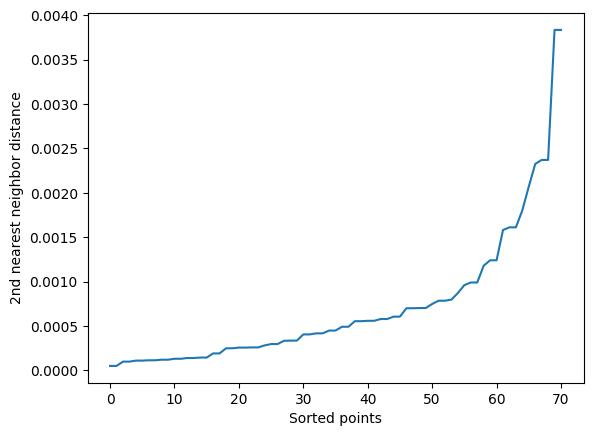

In [108]:
plt.plot(distances)
plt.xlabel('Sorted points')
plt.ylabel('2nd nearest neighbor distance')
plt.show()

In [109]:
EPS = 0.0025
minPts = 2

In [110]:
dbscan = DBSCAN(eps=EPS, min_samples=minPts, metric='haversine')
stops['dbscan_cluster'] = dbscan.fit_predict(stops[['LATITUDE', 'LONGITUDE']])

C:\Users\Acer\AppData\Local\Temp\ipykernel_7072\1086538443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops['dbscan_cluster'] = dbscan.fit_predict(stops[['LATITUDE', 'LONGITUDE']])


In [111]:
visualize_clusters_on_map(stops, stops['dbscan_cluster'])

In [112]:
silhouette_metric(stops, stops['dbscan_cluster'], "dbscan")

dbscan clustering: 0.4791
